# K-Means Clustering

Clustering is what we do when we have a bunch of data, and we don't know their classes (y values,labels) and we try to group them by looking at data.

K-means is an algorithm that will find k clusters for a given dataset. The number k is user defined. Each cluster is described by a single point known as centroid. Centroid means it's at the center of all the points in the cluster.

It works as follows. First, k centroids are randomly assigned. Then, all data points in the data are assigned to a cluster by finding closest centroid. After this step, centroids are updated by taking the mean value of all the points in that cluster.

K means is easy to implement but can easily converge at local minima. Since it is np-hard, it is also slow on large datasets.

### Pseudocode for K-Means

```
Creat k points randomly for centroids
Until no point changes cluster assignment
    for every point in our dataset:
        for every centroid
            calculate the distance between the centroid and point
        assign the point to the cluster with the lowest distance
    for every cluster:
        calculate the mean of the points in that cluster
        assign the centroid to the mean
```

First we will start by defining our helper functions.

In [117]:
#support functions for our k means 
from numpy import *

# loadDataSet, basically, reads our dataset form file 
# into dataMat variable
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = map(float,curLine)
        dataMat.append(fltLine)
    return dataMat


Our data consists of 80 data points and 2 features

In [118]:
dataMat = loadDataSet('data/kMeansTestSet.txt')
print shape(dataMat)

(80, 2)


In [119]:
# Euclidian distance between two arrays
def distEclud(vecA,vecB):
    return sqrt(sum(power(vecA-vecB,2)))

In [120]:
print distEclud(array([1,2,3]),array([2,3,4]))

1.73205080757


In [121]:
# Gives k random centroids for the n rows in the dataSet
# Note that these centroids are between the min and max
# values of each feature
def randCent(dataSet,k):
    numberOfFeatures = shape(dataSet)[1]
    centroids = mat(zeros((k,numberOfFeatures)))
    for featureNumber in range(numberOfFeatures):
        minVal = min(dataSet[:,featureNumber])
        rangeVal = float(max(dataSet[:,featureNumber]) - minVal)
        centroids[:,featureNumber] = minVal + rangeVal * random.rand(k,1)
    return centroids

In [122]:
print "Min feature 1 value ", min(datMat[:,0])
print "Max feature 1 value ", max(datMat[:,0])
print "Min feature 2 value ", min(datMat[:,1])
print "Min feature 2 value ", max(datMat[:,1])

Min feature 1 value  [[-5.379713]]
Max feature 1 value  [[ 4.838138]]
Min feature 2 value  [[-4.232586]]
Min feature 2 value  [[ 5.1904]]


In [123]:
print "Centroid values: "
print randCent(datMat, 5)

Centroid values: 
[[-3.3616012  -1.04983804]
 [-2.38695844 -1.76403421]
 [ 4.07517653 -1.03917496]
 [-3.18382929 -0.53241353]
 [-4.68692827 -2.58057144]]


Now, we can start writing about our kMeans algorithm. First let's remember the pseudocode for K-means.
```
Creat k points randomly for centroids
Until no point changes cluster assignment
    for every point in our dataset:
        for every centroid
            calculate the distance between the centroid and point
        assign the point to the cluster with the lowest distance
    for every cluster:
        calculate the mean of the points in that cluster
        assign the centroid to the mean
```

In [124]:
def kMeans(dataSet,k, distMeas=distEclud,createCent=randCent):
    numberOfPoints = shape(dataSet)[0]
    clusterAssigment= mat(zeros((numberOfPoints,2))) # assigned centroid index,distance value
    
    # Creat k points randomly for centroids
    centroids = createCent(dataSet,k) 

    clusterChanged = True 
    
    # Until no point changes cluster assignment
    while clusterChanged:
        clusterChanged = False
        
        # for every point in our dataset:
        for currentPointIndex in range(numberOfPoints):
            minDist =inf; minIndex=-1
        
            # for every centroid
            for currentCentroidIndex in range(k):
                # calculate the distance between the centroid and point
                distJI = distMeas(centroids[currentCentroidIndex,:],dataSet[currentPointIndex,:])
                # if we found a closer centroid, change minDist & minIndex
                if distJI < minDist:
                    minDist = distJI; 
                    minIndex = currentCentroidIndex
                    
            # assign the point to the cluster with the lowest distance
            if clusterAssigment[currentPointIndex,0] != minIndex: 
                clusterChanged=True
                clusterAssigment[currentPointIndex,:]= minIndex,minDist**2
        
        # for every cluster
        for cent in range(k):
            ptsInClust = dataSet[nonzero(clusterAssigment[:,0].A==cent)[0]]
            # calculate the mean of the points in that cluster
            # assign the centroid to the mean
            centroids[cent,:] = mean(ptsInClust,axis=0)
    return centroids,clusterAssigment
                    
            

In [125]:
myCentroids, clustAssing = kMeans(datMat,4)

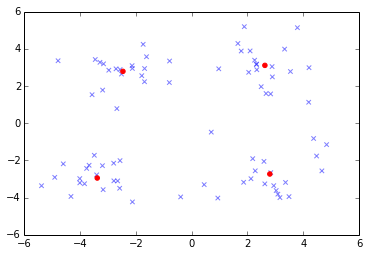

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(array(dataMat)[:,0], array(dataMat)[:,1],marker='x', alpha=0.5)
plt.scatter(array(myCentroids)[:,0], array(myCentroids)[:,1],marker='o',color='r', alpha=1.0)
